In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("fake reviews dataset (1).csv")

In [3]:
df.shape

(40432, 4)

In [4]:
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [5]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [6]:
import re
import string

In [7]:
df["text_"] = df["text_"].apply(wordopt)

In [8]:
df.columns

Index(['category', 'rating', 'label', 'text_'], dtype='object')

In [9]:
df1=df.iloc[:,[0,1,3,2]]

In [10]:
df1.head()

,category,rating,text_,label
0,Home_and_Kitchen_5,5.0,love this well made sturdy and very comfor...,CG
1,Home_and_Kitchen_5,5.0,love it a great upgrade from the original i...,CG
2,Home_and_Kitchen_5,5.0,this pillow saved my back i love the look and...,CG
3,Home_and_Kitchen_5,1.0,missing information on how to use it but it i...,CG
4,Home_and_Kitchen_5,5.0,very nice set good quality we have had the s...,CG


In [11]:
df1['label'].value_counts()

CG    20216
OR    20216
Name: label, dtype: int64

In [12]:
df1['label'].replace(['CG', 'OR'],
                        [0, 1], inplace=True)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [13]:
xfeatures=df['text_']
yfeatures=df['label']

In [14]:
x_train,x_test,y_train,y_test=train_test_split(xfeatures,yfeatures,test_size=0.2)

In [15]:
x_train.shape

(32345,)

In [16]:
x_test.shape

(8087,)

In [17]:
y_train.value_counts()

CG    16175
OR    16170
Name: label, dtype: int64

In [18]:
y_test.value_counts()

OR    4046
CG    4041
Name: label, dtype: int64

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
vectorization = TfidfVectorizer()
transformed_output = vectorization.fit_transform(df['text_'])
vectorization.vocabulary_

{'love': 19947,
 'this': 34301,
 'well': 37391,
 'made': 20225,
 'sturdy': 32861,
 'and': 1166,
 'very': 36599,
 'comfortable': 6486,
 'it': 17664,
 'pretty': 26033,
 'great': 14540,
 'upgrade': 36230,
 'from': 13427,
 'the': 34161,
 'original': 23677,
 've': 36482,
 'had': 14931,
 'mine': 21445,
 'for': 13063,
 'couple': 7415,
 'of': 23344,
 'years': 38295,
 'pillow': 25069,
 'saved': 29399,
 'my': 22305,
 'back': 2263,
 'look': 19840,
 'feel': 12293,
 'missing': 21618,
 'information': 16998,
 'on': 23470,
 'how': 16159,
 'to': 34621,
 'use': 36308,
 'but': 4503,
 'is': 17618,
 'product': 26216,
 'price': 26062,
 'nice': 22761,
 'set': 30121,
 'good': 14280,
 'quality': 26770,
 'we': 37263,
 'have': 15312,
 'two': 35536,
 'months': 21895,
 'now': 23085,
 'not': 23020,
 'been': 2834,
 'wanted': 37085,
 'different': 9193,
 'flavors': 12750,
 'they': 34243,
 'are': 1579,
 'perfect': 24695,
 'touch': 34863,
 'me': 20928,
 'only': 23491,
 'thing': 34272,
 'wish': 37817,
 'little': 19679,
 

In [21]:
feature_names=vectorization.get_feature_names_out()

In [22]:
feature_names

array(['aa', 'aaa', 'aaas', ..., 'zurg', 'zyliss', 'zymox'], dtype=object)

In [23]:
transformed_output.shape

(40432, 38566)

In [24]:
df1.head()

,category,rating,text_,label
0,Home_and_Kitchen_5,5.0,love this well made sturdy and very comfor...,0
1,Home_and_Kitchen_5,5.0,love it a great upgrade from the original i...,0
2,Home_and_Kitchen_5,5.0,this pillow saved my back i love the look and...,0
3,Home_and_Kitchen_5,1.0,missing information on how to use it but it i...,0
4,Home_and_Kitchen_5,5.0,very nice set good quality we have had the s...,0


In [25]:
df1['category'].replace(['Home_and_Kitchen_5', 'Sports_and_Outdoors_5','Electronics_5',
       'Movies_and_TV_5', 'Tools_and_Home_Improvement_5',
       'Pet_Supplies_5', 'Kindle_Store_5', 'Books_5', 'Toys_and_Games_5',
       'Clothing_Shoes_and_Jewelry_5'],
                        [0,1,2,3,4,5,6,7,8,9], inplace=True)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [26]:
df1.head()

,category,rating,text_,label
0,0,5.0,love this well made sturdy and very comfor...,0
1,0,5.0,love it a great upgrade from the original i...,0
2,0,5.0,this pillow saved my back i love the look and...,0
3,0,1.0,missing information on how to use it but it i...,0
4,0,5.0,very nice set good quality we have had the s...,0


In [27]:
df2 = pd.DataFrame(transformed_output.toarray(), columns=vectorization.vocabulary_)

In [28]:
df2

,love,this,well,made,sturdy,and,very,comfortable,it,pretty,...,tomahawk,ruck,warmness,minimizer,gallbladder,hippora,hyvent,dwr,ducks,merrels
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40429,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
df2.shape

(40432, 38566)

In [30]:
df2.isnull().sum()

love       0
this       0
well       0
made       0
sturdy     0
          ..
hippora    0
hyvent     0
dwr        0
ducks      0
merrels    0
Length: 38566, dtype: int64

In [31]:
df2['Mean'] = df2.mean(axis=1)

In [32]:
print(df2['Mean'])

0        0.000076
1        0.000086
2        0.000067
3        0.000086
4        0.000093
           ...   
40427    0.000272
40428    0.000218
40429    0.000293
40430    0.000197
40431    0.000281
Name: Mean, Length: 40432, dtype: float64


In [33]:
extracted_col = df2["Mean"]

In [34]:
df3 = df1.join(extracted_col)

In [35]:
df3

,category,rating,text_,label,Mean
0,0,5.0,love this well made sturdy and very comfor...,0,0.000076
1,0,5.0,love it a great upgrade from the original i...,0,0.000086
2,0,5.0,this pillow saved my back i love the look and...,0,0.000067
3,0,1.0,missing information on how to use it but it i...,0,0.000086
4,0,5.0,very nice set good quality we have had the s...,0,0.000093
...,...,...,...,...,...
40427,9,4.0,i had read some reviews saying that this bra r...,1,0.000272
40428,9,5.0,i wasn t sure exactly what it would be it is ...,0,0.000218
40429,9,2.0,you can wear the hood by itself wear it with ...,1,0.000293
40430,9,1.0,i liked nothing about this dress the only rea...,0,0.000197


In [36]:
df4=df3.drop(['text_'], axis=1)

In [37]:
df4

,category,rating,label,Mean
0,0,5.0,0,0.000076
1,0,5.0,0,0.000086
2,0,5.0,0,0.000067
3,0,1.0,0,0.000086
4,0,5.0,0,0.000093
...,...,...,...,...
40427,9,4.0,1,0.000272
40428,9,5.0,0,0.000218
40429,9,2.0,1,0.000293
40430,9,1.0,0,0.000197


In [38]:
df4.to_csv('df4.csv')

In [39]:
inp_shape=df4.shape

In [40]:
inp_shape

(40432, 4)

## Naive Bayes Classifier

In [41]:
import matplotlib.pyplot as mtp

In [42]:
x=df4[['category','rating','Mean']]
y=df4[['label']]

In [43]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)  

In [44]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(x_train, y_train)  

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [45]:
classifier.score(x_test,y_test)

0.5707926301471498

In [46]:
y_predict = classifier.predict(x_test)

In [47]:
from sklearn.metrics import classification_report 
cr = classification_report(y_test,y_predict)
print(cr)

              precision    recall  f1-score   support

           0       0.55      0.83      0.66      4047
           1       0.64      0.31      0.42      4040

    accuracy                           0.57      8087
   macro avg       0.60      0.57      0.54      8087
weighted avg       0.60      0.57      0.54      8087



In [48]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_predict)
print(acc)

0.5707926301471498


In [49]:
from sklearn.metrics import accuracy_score

## XGBoost

In [50]:
pip install xgboost

In [51]:
pip install --upgrade xgboost

Note: you may need to restart the kernel to use updated packages.


In [52]:
from numpy import loadtxt
from xgboost import XGBClassifier

In [53]:
# fit model no training data
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [54]:
# make predictions for test data
y_pred = model.predict(x_test)

In [55]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 58.29%


In [56]:
from sklearn.metrics import classification_report 
cr_2 = classification_report(y_test,y_pred)
print(cr_2)

              precision    recall  f1-score   support

           0       0.58      0.60      0.59      4047
           1       0.59      0.57      0.58      4040

    accuracy                           0.58      8087
   macro avg       0.58      0.58      0.58      8087
weighted avg       0.58      0.58      0.58      8087



## Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [58]:
y_pred_lr = lr.predict(x_test)

In [59]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy: %.2f%%" % (accuracy_lr * 100.0))

Accuracy: 49.18%


## Random Forest 

In [60]:
from sklearn.ensemble import RandomForestClassifier
regressor = RandomForestClassifier(n_estimators = 100)
regressor.fit(x_train, y_train) 

C:\Users\user\AppData\Local\Temp/ipykernel_1236/2390152549.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(x_train, y_train)


RandomForestClassifier()

In [61]:
rf_pred=regressor.predict(x_test)
rf_accuracy= accuracy_score(y_test, rf_pred)

In [62]:
print("Accuracy: %.2f%%" % (rf_accuracy * 100.0))

Accuracy: 56.03%


## CNN

In [63]:
#importing the required libraries
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [64]:
model=Sequential()
model.add(Dense(1000,input_dim=3,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [65]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=20,epochs=10,verbose=1)

Epoch 1/10
1618/1618 [==============================] - 38s 22ms/step - loss: 0.0000e+00 - accuracy: 0.5001 - val_loss: 0.0000e+00 - val_accuracy: 0.4996
Epoch 2/10
1618/1618 [==============================] - 22s 14ms/step - loss: 0.0000e+00 - accuracy: 0.5001 - val_loss: 0.0000e+00 - val_accuracy: 0.4996
Epoch 3/10
1618/1618 [==============================] - 21s 13ms/step - loss: 0.0000e+00 - accuracy: 0.5001 - val_loss: 0.0000e+00 - val_accuracy: 0.4996
Epoch 4/10
1618/1618 [==============================] - 20s 12ms/step - loss: 0.0000e+00 - accuracy: 0.5001 - val_loss: 0.0000e+00 - val_accuracy: 0.4996
Epoch 5/10
1618/1618 [==============================] - 21s 13ms/step - loss: 0.0000e+00 - accuracy: 0.5001 - val_loss: 0.0000e+00 - val_accuracy: 0.4996
Epoch 6/10
1618/1618 [==============================] - 21s 13ms/step - loss: 0.0000e+00 - accuracy: 0.5001 - val_loss: 0.0000e+00 - val_accuracy: 0.4996
Epoch 7/10
1618/1618 [==============================] - 25s 16ms/step - loss

In [66]:
prediction=model.predict(x_test)

253/253 [==============================] - 1s 4ms/step


In [67]:
accuracy_lr = accuracy_score(y_test, prediction)
print("Accuracy: %.2f%%" % (accuracy_lr * 100.0))

Accuracy: 49.96%


### NB and ADWIN

In [68]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.base import clone
from menelaus.concept_drift import LinearFourRates, ADWINAccuracy, DDM, EDDM, STEPD, MD3

In [69]:
training_size = 30324

In [70]:
X_train = df4.loc[0:training_size, ['category','rating','Mean']]
y_train = df4.loc[0:training_size, "label"]
X_test = df4.loc[training_size:len(df4), ['category','rating','Mean']]
y_true = df4.loc[training_size:len(df4), "label"]

In [71]:
np.random.seed(123)
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [72]:
acc_orig = np.cumsum(clf.predict(X_test) == y_true)
acc_orig = acc_orig / np.arange(1, 1 + len(acc_orig))
print(acc_orig)

30324    1.000000
30325    1.000000
30326    1.000000
30327    1.000000
30328    1.000000
           ...   
40427    0.580463
40428    0.580406
40429    0.580447
40430    0.580390
40431    0.580431
Name: label, Length: 10108, dtype: float64


In [73]:
acc_orig = np.cumsum(clf.predict(X_test) == y_true)
acc_orig = acc_orig / np.arange(1, 1 + len(acc_orig))
print(acc_orig)

30324    1.000000
30325    1.000000
30326    1.000000
30327    1.000000
30328    1.000000
           ...   
40427    0.580463
40428    0.580406
40429    0.580447
40430    0.580390
40431    0.580431
Name: label, Length: 10108, dtype: float64


In [74]:
import matplotlib.pyplot as plt

In [75]:
adwin = ADWINAccuracy()

# Set up DF to record results.
status = pd.DataFrame(
    columns=["index", "y_true", "y_pred", "adwin mean", "drift_detected"]
)
rec_list = []

In [76]:
for i in range(training_size, len(df4)):

    X_test = df4.loc[[i], ['category','rating','Mean']]
    y_pred = int(clf.predict(X_test))
    y_true = int(df4.loc[[i], "label"])

    adwin.update(y_true, y_pred)
    status.loc[i] = [
        i, y_true, y_pred, adwin.mean(), adwin.drift_state,
    ]

    # If drift is detected, examine the window and retrain.
    if adwin.drift_state == "drift":
        retrain_start = adwin.retraining_recs[0] + training_size
        retrain_end = adwin.retraining_recs[1] + training_size
        rec_list.append([retrain_start, retrain_end])

        # The retraining recommendations produced here correspond to the samples
        # which belong to ADWIN's new, smaller window, after drift is detected.
        # If retraining is not desired, omit the next four lines.
        X_train = df4.loc[retrain_start:retrain_end, ['category','rating','Mean']]
        y_train = df4.loc[retrain_start:retrain_end, "label"]
        clf = GaussianNB()
        clf.fit(X_train, y_train)

status['original_accuracy'] = acc_orig
status['accuracy'] = np.cumsum(status.y_true == status.y_pred)
status['accuracy'] = status['accuracy'] / np.cumsum(np.repeat(1, status.shape[0]))


In [77]:
status['accuracy'].tail(1)

40431    0.521171
Name: accuracy, dtype: float64

In [78]:
status['original_accuracy'].tail(1)

40431    0.580431
Name: original_accuracy, dtype: float64

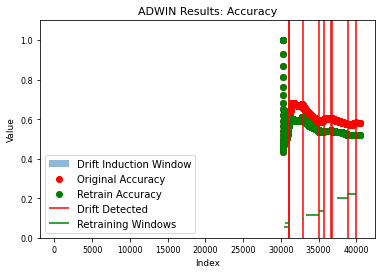

In [79]:
plt.figure(figsize=(6,4))
plt.scatter("index", "original_accuracy", data=status, label="Original Accuracy", color='red')
plt.scatter("index", "accuracy", data=status, label="Retrain Accuracy", color='green')
plt.grid(False, axis="x")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title("ADWIN Results: Accuracy", fontsize=11)
plt.ylabel("Value", fontsize=9)
plt.xlabel("Index", fontsize=9)
ylims = [0, 1.1]
plt.ylim(ylims)

plt.axvspan(100, 125, alpha=0.5, label="Drift Induction Window")

# Draw red lines that indicate where drift was detected
plt.vlines(
    x=status.loc[status["drift_detected"] == "drift"]["index"],
    ymin=ylims[0],
    ymax=ylims[1],
    label="Drift Detected",
    color="red",
)

# Create a list of lines that indicate the retraining windows.
# Space them evenly, vertically.
rec_list = pd.DataFrame(rec_list)
rec_list["y_val"] = np.linspace(
    start=0.05 * (ylims[1] - ylims[0]) + ylims[0],
    stop=0.2 * ylims[1],
    num=len(rec_list),
)

# Draw green lines that indicate where retraining occurred
plt.hlines(
    y=rec_list["y_val"],
    xmin=rec_list[0],
    xmax=rec_list[1],
    color="green",
    label="Retraining Windows",
)

plt.legend(loc='lower left')
plt.show()
# plt.savefig("example_ADWINAccuracy.png")

### LR and ADWIN

In [80]:
X_train = df4.loc[0:training_size, ['category','rating','Mean']]
y_train = df4.loc[0:training_size, "label"]
X_test = df4.loc[training_size:len(df4), ['category','rating','Mean']]
y_true = df4.loc[training_size:len(df4), "label"]

In [81]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
acc_orig = np.cumsum(model.predict(X_test) == y_true)
acc_orig = acc_orig / np.arange(1, 1 + len(acc_orig))
print(acc_orig)

30324    1.000000
30325    0.500000
30326    0.666667
30327    0.750000
30328    0.800000
           ...   
40427    0.502573
40428    0.502622
40429    0.502672
40430    0.502622
40431    0.502572
Name: label, Length: 10108, dtype: float64


In [82]:
adwin = ADWINAccuracy()

# Set up DF to record results.
status = pd.DataFrame(
    columns=["index", "y_true", "y_pred", "adwin mean", "drift_detected"]
)
rec_list = []

In [83]:
for i in range(training_size, len(df4)):

    X_test = df4.loc[[i], ['category','rating','Mean']]
    y_pred = int(model.predict(X_test))
    y_true = int(df4.loc[[i], "label"])

    adwin.update(y_true, y_pred)
    status.loc[i] = [
        i, y_true, y_pred, adwin.mean(), adwin.drift_state,
    ]

    # If drift is detected, examine the window and retrain.
    if adwin.drift_state == "drift":
        retrain_start = adwin.retraining_recs[0] + training_size
        retrain_end = adwin.retraining_recs[1] + training_size
        rec_list.append([retrain_start, retrain_end])

        # The retraining recommendations produced here correspond to the samples
        # which belong to ADWIN's new, smaller window, after drift is detected.
        # If retraining is not desired, omit the next four lines.
        X_train = df4.loc[retrain_start:retrain_end, ['category','rating','Mean']]
        y_train = df4.loc[retrain_start:retrain_end, "label"]
        model = LogisticRegression()
        model.fit(X_train, y_train)
status['original_accuracy'] = acc_orig
status['accuracy'] = np.cumsum(status.y_true == status.y_pred)
status['accuracy'] = status['accuracy'] / np.cumsum(np.repeat(1, status.shape[0]))


In [84]:
status['accuracy'].tail(1)

40431    0.502572
Name: accuracy, dtype: float64

In [85]:
status['original_accuracy'].tail(1)

40431    0.502572
Name: original_accuracy, dtype: float64

KeyError: 0

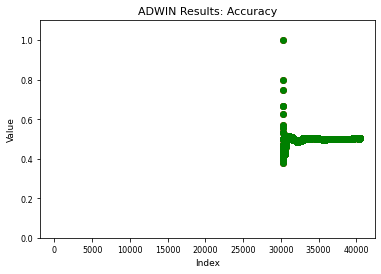

In [88]:
plt.figure(figsize=(6,4))
plt.scatter("index", "original_accuracy", data=status, label="Original Accuracy", color='red')
plt.scatter("index", "accuracy", data=status, label="Retrain Accuracy", color='green')
plt.grid(False, axis="x")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title("ADWIN Results: Accuracy", fontsize=11)
plt.ylabel("Value", fontsize=9)
plt.xlabel("Index", fontsize=9)
ylims = [0, 1.1]
plt.ylim(ylims)

plt.axvspan(100, 125, alpha=0.5, label="Drift Induction Window")

# Draw red lines that indicate where drift was detected
plt.vlines(
    x=status.loc[status["drift_detected"] == "drift"]["index"],
    ymin=ylims[0],
    ymax=ylims[1],
    label="Drift Detected",
    color="red",
)

# Create a list of lines that indicate the retraining windows.
# Space them evenly, vertically.
rec_list = pd.DataFrame(rec_list)
rec_list["y_val"] = np.linspace(
    start=0.05 * (ylims[1] - ylims[0]) + ylims[0],
    stop=0.2 * ylims[1],
    num=len(rec_list),
)

# Draw green lines that indicate where retraining occurred
plt.hlines(
    y=rec_list["y_val"],
    xmin=rec_list[0],
    xmax=rec_list[1],
    color="green",
    label="Retraining Windows",
)

plt.legend(loc='lower left')
plt.show()
# plt.savefig("example_ADWINAccuracy.png")

### RF and ADWIN

In [89]:
X_train = df4.loc[0:training_size, ['category','rating','Mean']]
y_train = df4.loc[0:training_size, "label"]
X_test = df4.loc[training_size:len(df4), ['category','rating','Mean']]
y_true = df4.loc[training_size:len(df4), "label"]

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
np.random.seed(123)
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(X_train, y_train)
acc_orig = np.cumsum(clf.predict(X_test) == y_true)
acc_orig = acc_orig / np.arange(1, 1 + len(acc_orig))
print(acc_orig)

30324    0.000000
30325    0.000000
30326    0.000000
30327    0.000000
30328    0.000000
           ...   
40427    0.557205
40428    0.557150
40429    0.557194
40430    0.557139
40431    0.557182
Name: label, Length: 10108, dtype: float64


In [92]:
adwin = ADWINAccuracy()

# Set up DF to record results.
status = pd.DataFrame(
    columns=["index", "y_true", "y_pred", "adwin mean", "drift_detected"]
)
rec_list = []

In [93]:
for i in range(training_size, len(df4)):

    X_test = df4.loc[[i], ['category','rating','Mean']]
    y_pred = int(clf.predict(X_test))
    y_true = int(df4.loc[[i], "label"])

    adwin.update(y_true, y_pred)
    status.loc[i] = [
        i, y_true, y_pred, adwin.mean(), adwin.drift_state,
    ]

    # If drift is detected, examine the window and retrain.
    if adwin.drift_state == "drift":
        retrain_start = adwin.retraining_recs[0] + training_size
        retrain_end = adwin.retraining_recs[1] + training_size
        rec_list.append([retrain_start, retrain_end])

        # The retraining recommendations produced here correspond to the samples
        # which belong to ADWIN's new, smaller window, after drift is detected.
        # If retraining is not desired, omit the next four lines.
        X_train = df4.loc[retrain_start:retrain_end, ['category','rating','Mean']]
        y_train = df4.loc[retrain_start:retrain_end, "label"]
        clf = RandomForestClassifier(n_estimators = 100) 
        clf.fit(X_train, y_train)
status['original_accuracy'] = acc_orig
status['accuracy'] = np.cumsum(status.y_true == status.y_pred)
status['accuracy'] = status['accuracy'] / np.cumsum(np.repeat(1, status.shape[0]))

In [94]:
status['accuracy'].tail(1)

40431    0.525623
Name: accuracy, dtype: float64

In [95]:
status['original_accuracy'].tail(1)

40431    0.557182
Name: original_accuracy, dtype: float64

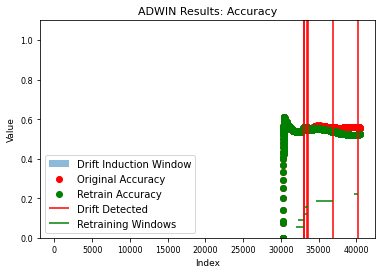

In [96]:
plt.figure(figsize=(6, 4))
plt.scatter("index", "original_accuracy", data=status, label="Original Accuracy", color='red')
plt.scatter("index", "accuracy", data=status, label="Retrain Accuracy", color='green')
plt.grid(False, axis="x")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title("ADWIN Results: Accuracy", fontsize=11)
plt.ylabel("Value", fontsize=9)
plt.xlabel("Index", fontsize=9)
ylims = [0, 1.1]
plt.ylim(ylims)

plt.axvspan(100, 125, alpha=0.5, label="Drift Induction Window")

# Draw red lines that indicate where drift was detected
plt.vlines(
    x=status.loc[status["drift_detected"] == "drift"]["index"],
    ymin=ylims[0],
    ymax=ylims[1],
    label="Drift Detected",
    color="red",
)

# Create a list of lines that indicate the retraining windows.
# Space them evenly, vertically.
rec_list = pd.DataFrame(rec_list)
rec_list["y_val"] = np.linspace(
    start=0.05 * (ylims[1] - ylims[0]) + ylims[0],
    stop=0.2 * ylims[1],
    num=len(rec_list),
)

# Draw green lines that indicate where retraining occurred
plt.hlines(
    y=rec_list["y_val"],
    xmin=rec_list[0],
    xmax=rec_list[1],
    color="green",
    label="Retraining Windows",
)

plt.legend(loc='lower left')
plt.show()
# plt.savefig("example_ADWINAccuracy.png")


### CNN and ADWIN

In [97]:
training_size = 30324

In [98]:
X_train = df4.loc[0:training_size, ['category','rating','Mean']]
y_train = df4.loc[0:training_size, "label"]
X_test = df4.loc[training_size:len(df4), ['category','rating','Mean']]
y_true = df4.loc[training_size:len(df4), "label"]

In [99]:
model=Sequential()
model.add(Dense(1000,input_dim=3,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [100]:
model.fit(X_train,y_train,validation_data=(X_test,y_true),batch_size=20,epochs=10,verbose=1)

Epoch 1/10
1517/1517 [==============================] - 21s 13ms/step - loss: 0.0000e+00 - accuracy: 0.4999 - val_loss: 0.0000e+00 - val_accuracy: 0.5002
Epoch 2/10
1517/1517 [==============================] - 22s 15ms/step - loss: 0.0000e+00 - accuracy: 0.4999 - val_loss: 0.0000e+00 - val_accuracy: 0.5002
Epoch 3/10
1517/1517 [==============================] - 22s 14ms/step - loss: 0.0000e+00 - accuracy: 0.4999 - val_loss: 0.0000e+00 - val_accuracy: 0.5002
Epoch 4/10
1517/1517 [==============================] - 19s 13ms/step - loss: 0.0000e+00 - accuracy: 0.4999 - val_loss: 0.0000e+00 - val_accuracy: 0.5002
Epoch 5/10
1517/1517 [==============================] - 20s 13ms/step - loss: 0.0000e+00 - accuracy: 0.4999 - val_loss: 0.0000e+00 - val_accuracy: 0.5002
Epoch 6/10
1517/1517 [==============================] - 20s 13ms/step - loss: 0.0000e+00 - accuracy: 0.4999 - val_loss: 0.0000e+00 - val_accuracy: 0.5002
Epoch 7/10
1517/1517 [==============================] - 23s 15ms/step - loss

In [101]:
acc_orig = np.cumsum(clf.predict(X_test) == y_true)
acc_orig = acc_orig / np.arange(1, 1 + len(acc_orig))
print(acc_orig)

30324    1.000000
30325    1.000000
30326    1.000000
30327    1.000000
30328    1.000000
           ...   
40427    0.589766
40428    0.589807
40429    0.589848
40430    0.589789
40431    0.589830
Name: label, Length: 10108, dtype: float64


In [102]:
for i in range(training_size,len(df4)-i):

    X_test = df4.loc[[i], ['category','rating','Mean']]
    y_pred = int(clf.predict(X_test))
    y_true = int(df4.loc[[i], "label"])

    adwin.update(y_true, y_pred)
    status.loc[i] = [
        i, y_true, y_pred, adwin.mean(), adwin.drift_state,
    ]

In [103]:
    # If drift is detected, examine the window and retrain.
    if adwin.drift_state == "drift":
        retrain_start = adwin.retraining_recs[0] + training_size
        retrain_end = adwin.retraining_recs[1] + training_size
        rec_list.append([retrain_start, retrain_end])

        # The retraining recommendations produced here correspond to the samples
        # which belong to ADWIN's new, smaller window, after drift is detected.
        # If retraining is not desired, omit the next four lines.
        X_train = df4.loc[retrain_start:retrain_end, ['category','rating','Mean']]
        y_train = df4.loc[retrain_start:retrain_end, "label"]
        model=Sequential()
        model.add(Dense(1000,input_dim=3,activation='relu'))
        model.add(Dense(500,activation='relu'))
        model.add(Dense(300,activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(1,activation='softmax'))
        model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
        model.fit(X_train,y_train,validation_data=(X_test,y_true),batch_size=20,epochs=10,verbose=1)
status['original_accuracy'] = acc_orig
status['accuracy'] = np.cumsum(status.y_true == status.y_pred)
status['accuracy'] = status['accuracy'] / np.cumsum(np.repeat(1, status.shape[0]))

In [104]:
status['accuracy'].tail(1)

40431    0.525623
Name: accuracy, dtype: float64

In [105]:
status['original_accuracy'].tail(1)

40431    0.58983
Name: original_accuracy, dtype: float64

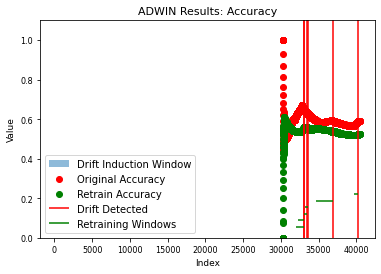

In [106]:
plt.figure(figsize=(6,4))
plt.scatter("index", "original_accuracy", data=status, label="Original Accuracy", color='red')
plt.scatter("index", "accuracy", data=status, label="Retrain Accuracy", color='green')
plt.grid(False, axis="x")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title("ADWIN Results: Accuracy", fontsize=11)
plt.ylabel("Value", fontsize=9)
plt.xlabel("Index", fontsize=9)
ylims = [0, 1.1]
plt.ylim(ylims)

plt.axvspan(100, 125, alpha=0.5, label="Drift Induction Window")

# Draw red lines that indicate where drift was detected
plt.vlines(
    x=status.loc[status["drift_detected"] == "drift"]["index"],
    ymin=ylims[0],
    ymax=ylims[1],
    label="Drift Detected",
    color="red",
)

# Create a list of lines that indicate the retraining windows.
# Space them evenly, vertically.
rec_list = pd.DataFrame(rec_list)
rec_list["y_val"] = np.linspace(
    start=0.05 * (ylims[1] - ylims[0]) + ylims[0],
    stop=0.2 * ylims[1],
    num=len(rec_list),
)

# Draw green lines that indicate where retraining occurred
plt.hlines(
    y=rec_list["y_val"],
    xmin=rec_list[0],
    xmax=rec_list[1],
    color="green",
    label="Retraining Windows",
)

plt.legend(loc='lower left')
plt.show()
# plt.savefig("example_ADWINAccuracy.png")


### NB and EDDM 

In [107]:
np.random.seed(123)
# setup classifier: train on first 500 rows
X_train = df4.loc[0:training_size, ['category','rating','Mean']]
y_train = df4.loc[0:training_size, "label"]
X_test = df4.loc[training_size:len(df3), ['category','rating','Mean']]
y_true = df4.loc[training_size:len(df3), "label"]

clf = GaussianNB()
clf.fit(X_train, y_train)

acc_orig = np.cumsum(clf.predict(X_test) == y_true)
acc_orig = acc_orig / np.arange(1, 1 + len(acc_orig))

In [108]:
eddm = EDDM(n_threshold=30, warning_thresh=0.7, drift_thresh=0.5)

# setup DF to store results
status = pd.DataFrame(columns=["index", "y_true", "y_pred", "drift_detected"])
rec_list = []


In [109]:
for i in range(training_size, len(df4)):

    X_test = df4.loc[[i], ['category','rating','Mean']]
    y_pred = int(clf.predict(X_test))
    y_true = int(df4.loc[[i], "label"])

    eddm.update(y_true, y_pred)
    status.loc[i] = [i, y_true, y_pred, eddm.drift_state]

    # If drift is detected, examine the window and retrain.
    if eddm.drift_state == "drift":
        retrain_start = eddm.retraining_recs[0] + training_size
        retrain_end = eddm.retraining_recs[1] + training_size
        if (
            retrain_start == retrain_end
        ):  # minimum retraining window in case of sudden drift
            retrain_start = max(0, retrain_start - 300)
        rec_list.append([retrain_start, retrain_end])

        # If retraining is not desired, omit the next four lines.
        X_train = df4.loc[retrain_start:retrain_end, ['category','rating','Mean']]
        y_train = df4.loc[retrain_start:retrain_end, "label"]
        clf = GaussianNB()
        clf.fit(X_train, y_train)

status['original_accuracy'] = acc_orig
status['accuracy'] = np.cumsum(status.y_true == status.y_pred)
status['accuracy'] = status['accuracy'] / np.cumsum(np.repeat(1, status.shape[0]))

In [110]:
status['accuracy'].tail(1)

40431    0.560744
Name: accuracy, dtype: float64

In [111]:
status['original_accuracy'].tail(1)

40431    0.580431
Name: original_accuracy, dtype: float64

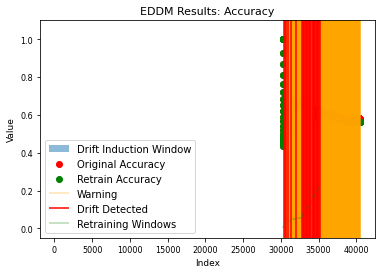

In [112]:
plt.figure(figsize=(6,4))
plt.scatter("index", "original_accuracy", data=status, label="Original Accuracy", color='red')
plt.scatter("index", "accuracy", data=status, label="Retrain Accuracy", color='green')
plt.grid(False, axis="x")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title("EDDM Results: Accuracy", fontsize=11)
plt.ylabel("Value", fontsize=9)
plt.xlabel("Index", fontsize=9)
ylims = [-0.05, 1.1]
plt.ylim(ylims)

plt.axvspan(100, 125, alpha=0.5, label="Drift Induction Window")

# Draw orange lines that indicate where warnings of drift were provided
plt.vlines(
    x=status.loc[status["drift_detected"] == "warning"]["index"],
    ymin=ylims[0],
    ymax=ylims[1],
    label="Warning",
    color="orange",
    alpha=0.3,
)

# Draw red lines that indicate where drift was detected
plt.vlines(
    x=status.loc[status["drift_detected"] == "drift"]["index"],
    ymin=ylims[0],
    ymax=ylims[1],
    label="Drift Detected",
    color="red",
)
# Create a list of lines that indicate the retraining windows.
# Space them evenly, vertically.
rec_list = pd.DataFrame(rec_list)
rec_list["y_val"] = np.linspace(
    start=0.05 * (ylims[1] - ylims[0]) + ylims[0],
    stop=0.2 * ylims[1],
    num=len(rec_list),
)

# Draw green lines that indicate where retraining occurred
plt.hlines(
    y=rec_list["y_val"],
    xmin=rec_list[0],
    xmax=rec_list[1],
    color="green",
    label="Retraining Windows",
    alpha=0.3,
)

plt.legend(loc="lower left")
plt.show()
# plt.savefig("example_EDDM.png")

### LR and EDDM 

In [113]:
X_train = df4.loc[0:training_size, ['category','rating','Mean']]
y_train = df4.loc[0:training_size, "label"]
X_test = df4.loc[training_size:len(df4), ['category','rating','Mean']]
y_true = df4.loc[training_size:len(df4), "label"]

In [114]:
y_train.unique()

array([0, 1], dtype=int64)

In [115]:
model = LogisticRegression()
model.fit(X_train, y_train)
acc_orig = np.cumsum(model.predict(X_test) == y_true)
acc_orig = acc_orig / np.arange(1, 1 + len(acc_orig))
print(acc_orig)

30324    1.000000
30325    0.500000
30326    0.666667
30327    0.750000
30328    0.800000
           ...   
40427    0.502573
40428    0.502622
40429    0.502672
40430    0.502622
40431    0.502572
Name: label, Length: 10108, dtype: float64


In [116]:
eddm = EDDM(n_threshold=30, warning_thresh=0.7, drift_thresh=0.5)

# setup DF to store results
status = pd.DataFrame(columns=["index", "y_true", "y_pred", "drift_detected"])
rec_list = []

In [117]:
for i in range(training_size, len(df4)):

    X_test = df4.loc[[i], ['category','rating','Mean']]
    y_pred = int(model.predict(X_test))
    y_true = int(df4.loc[[i], "label"])

    eddm.update(y_true, y_pred)
    status.loc[i] = [i, y_true, y_pred, eddm.drift_state]

    # If drift is detected, examine the window and retrain.
    if eddm.drift_state == "drift":
        retrain_start = eddm.retraining_recs[0] + training_size
        retrain_end = eddm.retraining_recs[1] + training_size
        if (
            retrain_start == retrain_end
        ):  # minimum retraining window in case of sudden drift
            retrain_start = max(0, retrain_start - 300)
        rec_list.append([retrain_start, retrain_end])

        # If retraining is not desired, omit the next four lines.
        X_train = df4.loc[retrain_start:retrain_end, ['category','rating','Mean']]
        y_train = df4.loc[retrain_start:retrain_end, "label"]
        model = LogisticRegression()
        model.fit(X_train, y_train)

status['original_accuracy'] = acc_orig
status['accuracy'] = np.cumsum(status.y_true == status.y_pred)
status['accuracy'] = status['accuracy'] / np.cumsum(np.repeat(1, status.shape[0]))

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

In [ ]:
status['accuracy'].tail(1)

In [ ]:
status['original_accuracy'].tail(1)

In [ ]:
y_train.unique()

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter("index", "original_accuracy", data=status, label="Original Accuracy", color='red')
plt.scatter("index", "accuracy", data=status, label="Retrain Accuracy", color='green')
plt.grid(False, axis="x")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title("EDDM Results: Accuracy", fontsize=11)
plt.ylabel("Value", fontsize=9)
plt.xlabel("Index", fontsize=9)
ylims = [-0.05, 1.1]
plt.ylim(ylims)

plt.axvspan(100, 125, alpha=0.5, label="Drift Induction Window")

# Draw orange lines that indicate where warnings of drift were provided
plt.vlines(
    x=status.loc[status["drift_detected"] == "warning"]["index"],
    ymin=ylims[0],
    ymax=ylims[1],
    label="Warning",
    color="orange",
    alpha=0.3,
)

# Draw red lines that indicate where drift was detected
plt.vlines(
    x=status.loc[status["drift_detected"] == "drift"]["index"],
    ymin=ylims[0],
    ymax=ylims[1],
    label="Drift Detected",
    color="red",
)
# Create a list of lines that indicate the retraining windows.
# Space them evenly, vertically.
rec_list = pd.DataFrame(rec_list)
rec_list["y_val"] = np.linspace(
    start=0.05 * (ylims[1] - ylims[0]) + ylims[0],
    stop=0.2 * ylims[1],
    num=len(rec_list),
)

# Draw green lines that indicate where retraining occurred
plt.hlines(
    y=rec_list["y_val"],
    xmin=rec_list[0],
    xmax=rec_list[1],
    color="green",
    label="Retraining Windows",
    alpha=0.3,
)

plt.legend(loc="lower left")
plt.show()
# plt.savefig("example_EDDM.png")

### RF and EDDM

In [161]:
eddm = EDDM(n_threshold=30, warning_thresh=0.7, drift_thresh=0.5)

# setup DF to store results
status = pd.DataFrame(columns=["index", "y_true", "y_pred", "drift_detected"])
rec_list = []

In [162]:
for i in range(training_size, len(df4)):

    X_test = df4.loc[[i], ['category','rating','Mean']]
    y_pred = int(clf.predict(X_test))
    y_true = int(df4.loc[[i], "label"])

    eddm.update(y_true, y_pred)
    status.loc[i] = [i, y_true, y_pred, eddm.drift_state]

    # If drift is detected, examine the window and retrain.
    if eddm.drift_state == "drift":
        retrain_start = eddm.retraining_recs[0] + training_size
        retrain_end = eddm.retraining_recs[1] + training_size
        if (
            retrain_start == retrain_end
        ):  # minimum retraining window in case of sudden drift
            retrain_start = max(0, retrain_start - 300)
        rec_list.append([retrain_start, retrain_end])

        # If retraining is not desired, omit the next four lines.
        X_train = df4.loc[retrain_start:retrain_end, ['category','rating','Mean']]
        y_train = df4.loc[retrain_start:retrain_end, "label"]
        clf = RandomForestClassifier(n_estimators = 100) 
        clf.fit(X_train, y_train)

status['original_accuracy'] = acc_orig
status['accuracy'] = np.cumsum(status.y_true == status.y_pred)
status['accuracy'] = status['accuracy'] / np.cumsum(np.repeat(1, status.shape[0]))

In [163]:
status['accuracy'].tail(1)

40431    0.58429
Name: accuracy, dtype: float64

In [164]:
status['original_accuracy'].tail(1)

40431    0.502572
Name: original_accuracy, dtype: float64

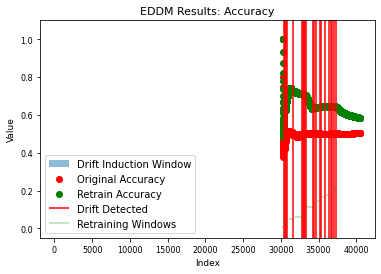

In [168]:
plt.figure(figsize=(6,4))
plt.scatter("index", "original_accuracy", data=status, label="Original Accuracy", color='red')
plt.scatter("index", "accuracy", data=status, label="Retrain Accuracy", color='green')
plt.grid(False, axis="x")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title("EDDM Results: Accuracy", fontsize=11)
plt.ylabel("Value", fontsize=9)
plt.xlabel("Index", fontsize=9)
ylims = [-0.05, 1.1]
plt.ylim(ylims)

plt.axvspan(100, 125, alpha=0.5, label="Drift Induction Window")

# Draw red lines that indicate where drift was detected
plt.vlines(
    x=status.loc[status["drift_detected"] == "drift"]["index"],
    ymin=ylims[0],
    ymax=ylims[1],
    label="Drift Detected",
    color="red",
)
# Create a list of lines that indicate the retraining windows.
# Space them evenly, vertically.
rec_list = pd.DataFrame(rec_list)
rec_list["y_val"] = np.linspace(
    start=0.05 * (ylims[1] - ylims[0]) + ylims[0],
    stop=0.2 * ylims[1],
    num=len(rec_list),
)

# Draw green lines that indicate where retraining occurred
plt.hlines(
    y=rec_list["y_val"],
    xmin=rec_list[0],
    xmax=rec_list[1],
    color="green",
    label="Retraining Windows",
    alpha=0.3,
)

plt.legend(loc="lower left")
plt.show()
# plt.savefig("example_EDDM.png")

### CNN and EDDM 

In [170]:
X_train = df4.loc[0:training_size, ['category','rating','Mean']]
y_train = df4.loc[0:training_size, "label"]
X_test = df4.loc[training_size:len(df4), ['category','rating','Mean']]
y_true = df4.loc[training_size:len(df4), "label"]

In [171]:
model=Sequential()
model.add(Dense(1000,input_dim=3,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [172]:
model.fit(X_train,y_train,validation_data=(X_test,y_true),batch_size=20,epochs=10,verbose=1)

Epoch 1/10
1517/1517 [==============================] - 22s 14ms/step - loss: 0.0000e+00 - accuracy: 0.4999 - val_loss: 0.0000e+00 - val_accuracy: 0.5002
Epoch 2/10
1517/1517 [==============================] - 19s 12ms/step - loss: 0.0000e+00 - accuracy: 0.4999 - val_loss: 0.0000e+00 - val_accuracy: 0.5002
Epoch 3/10
1517/1517 [==============================] - 20s 13ms/step - loss: 0.0000e+00 - accuracy: 0.4999 - val_loss: 0.0000e+00 - val_accuracy: 0.5002
Epoch 4/10
1517/1517 [==============================] - 20s 13ms/step - loss: 0.0000e+00 - accuracy: 0.4999 - val_loss: 0.0000e+00 - val_accuracy: 0.5002
Epoch 5/10
1517/1517 [==============================] - 19s 13ms/step - loss: 0.0000e+00 - accuracy: 0.4999 - val_loss: 0.0000e+00 - val_accuracy: 0.5002
Epoch 6/10
1517/1517 [==============================] - 19s 13ms/step - loss: 0.0000e+00 - accuracy: 0.4999 - val_loss: 0.0000e+00 - val_accuracy: 0.5002
Epoch 7/10
1517/1517 [==============================] - 24s 16ms/step - loss

In [173]:
acc_orig = np.cumsum(clf.predict(X_test) == y_true)
acc_orig = acc_orig / np.arange(1, 1 + len(acc_orig))
print(acc_orig)

30324    1.000000
30325    1.000000
30326    1.000000
30327    1.000000
30328    1.000000
           ...   
40427    0.478820
40428    0.478872
40429    0.478824
40430    0.478777
40431    0.478730
Name: label, Length: 10108, dtype: float64


In [174]:
for i in range(training_size,len(df4)-i):

    X_test = df4.loc[[i], ['category','rating','Mean']]
    y_pred = int(clf.predict(X_test))
    y_true = int(df4.loc[[i], "label"])

    eddm.update(y_true, y_pred)
    status.loc[i] = [
        i, y_true, y_pred, eddm.mean(), eddm.drift_state,
    ]

In [175]:
    # If drift is detected, examine the window and retrain.
    if eddm.drift_state == "drift":
        retrain_start = eddm.retraining_recs[0] + training_size
        retrain_end = eddm.retraining_recs[1] + training_size
        rec_list.append([retrain_start, retrain_end])

        # The retraining recommendations produced here correspond to the samples
        # which belong to ADWIN's new, smaller window, after drift is detected.
        # If retraining is not desired, omit the next four lines.
        X_train = df4.loc[retrain_start:retrain_end, ['category','rating','Mean']]
        y_train = df4.loc[retrain_start:retrain_end, "label"]
        model=Sequential()
        model.add(Dense(1000,input_dim=3,activation='relu'))
        model.add(Dense(500,activation='relu'))
        model.add(Dense(300,activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(1,activation='softmax'))
        model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
        model.fit(X_train,y_train,validation_data=(X_test,y_true),batch_size=20,epochs=10,verbose=1)
status['original_accuracy'] = acc_orig
status['accuracy'] = np.cumsum(status.y_true == status.y_pred)
status['accuracy'] = status['accuracy'] / np.cumsum(np.repeat(1, status.shape[0]))

In [176]:
status['original_accuracy'].tail(1)

40431    0.47873
Name: original_accuracy, dtype: float64

In [177]:
status['accuracy'].tail(1)

40431    0.58429
Name: accuracy, dtype: float64

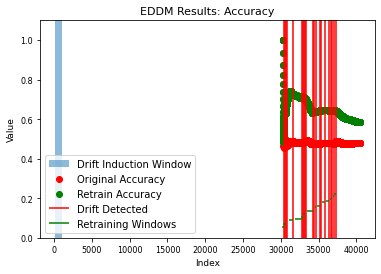

In [178]:
plt.figure(figsize=(6,4))
plt.scatter("index", "original_accuracy", data=status, label="Original Accuracy", color='red')
plt.scatter("index", "accuracy", data=status, label="Retrain Accuracy", color='green')
plt.grid(False, axis="x")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title("EDDM Results: Accuracy", fontsize=11)
plt.ylabel("Value", fontsize=9)
plt.xlabel("Index", fontsize=9)
ylims = [0, 1.1]
plt.ylim(ylims)

plt.axvspan(1000, 125, alpha=0.5, label="Drift Induction Window")

# Draw red lines that indicate where drift was detected
plt.vlines(
    x=status.loc[status["drift_detected"] == "drift"]["index"],
    ymin=ylims[0],
    ymax=ylims[1],
    label="Drift Detected",
    color="red",
)

# Create a list of lines that indicate the retraining windows.
# Space them evenly, vertically.
rec_list = pd.DataFrame(rec_list)
rec_list["y_val"] = np.linspace(
    start=0.05 * (ylims[1] - ylims[0]) + ylims[0],
    stop=0.2 * ylims[1],
    num=len(rec_list),
)

# Draw green lines that indicate where retraining occurred
plt.hlines(
    y=rec_list["y_val"],
    xmin=rec_list[0],
    xmax=rec_list[1],
    color="green",
    label="Retraining Windows",
)

plt.legend(loc='lower left')
plt.show()
# plt.savefig("example_ADWINAccuracy.png")

### LR and DDM

In [179]:
X_train = df4.loc[0:training_size, ['category','rating','Mean']]
y_train = df4.loc[0:training_size, "label"]
X_test = df4.loc[training_size:len(df4), ['category','rating','Mean']]
y_true = df4.loc[training_size:len(df4), "label"]

In [180]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
acc_orig = np.cumsum(model.predict(X_test) == y_true)
acc_orig = acc_orig / np.arange(1, 1 + len(acc_orig))
print(acc_orig)

30324    1.000000
30325    0.500000
30326    0.666667
30327    0.750000
30328    0.800000
           ...   
40427    0.502573
40428    0.502622
40429    0.502672
40430    0.502622
40431    0.502572
Name: label, Length: 10108, dtype: float64


In [181]:
ddm = DDM(n_threshold=100, warning_scale=7, drift_scale=10)

# setup DF to store results
status = pd.DataFrame(columns=["index", "y_true", "y_pred", "drift_detected"])
rec_list = []

In [182]:
for i in range(training_size, len(df4)):

    X_test = df4.loc[[i], ['category','rating','Mean']]
    y_pred = int(model.predict(X_test))
    y_true = int(df4.loc[[i], "label"])

    ddm.update(y_true, y_pred)
    status.loc[i] = [i, y_true, y_pred, ddm.drift_state]

    # If drift is detected, examine the window and retrain.
    if ddm.drift_state == "drift":
        print("Detected at"+str(i))
        retrain_start = ddm.retraining_recs[0] +training_size
        retrain_end = ddm.retraining_recs[1] + training_size
        if (
            retrain_start == retrain_end
        ):  # minimum retraining window in case of sudden drift
            retrain_start = max(0, retrain_start - 300)
        rec_list.append([retrain_start, retrain_end])

        # If retraining is not desired, omit the next four lines.
        X_train = df4.loc[retrain_start:retrain_end, ['category','rating','Mean']]
        y_train = df4.loc[retrain_start:retrain_end, "label"]
        model = LogisticRegression()
        model.fit(X_train, y_train)

status['original_accuracy'] = acc_orig
status['accuracy'] = np.cumsum(status.y_true == status.y_pred)
status['accuracy'] = status['accuracy'] / np.cumsum(np.repeat(1, status.shape[0]))

In [183]:
status['original_accuracy'].tail(1)

40431    0.502572
Name: original_accuracy, dtype: float64

In [184]:
status['accuracy'].tail(1)

40431    0.502572
Name: accuracy, dtype: float64

KeyError: 0

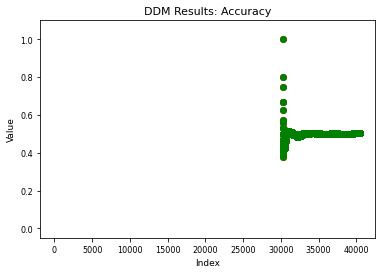

In [185]:
plt.figure(figsize=(6,4))
plt.scatter("index", "original_accuracy", data=status, label="Original Accuracy", color='red')
plt.scatter("index", "accuracy", data=status, label="Retrain Accuracy", color='green')
plt.grid(False, axis="x")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title("DDM Results: Accuracy", fontsize=11)
plt.ylabel("Value", fontsize=9)
plt.xlabel("Index", fontsize=9)
ylims = [-0.05, 1.1]
plt.ylim(ylims)

plt.axvspan(100, 125, alpha=0.5, label="Drift Induction Window")

# Draw red lines that indicate where drift was detected
plt.vlines(
    x=status.loc[status["drift_detected"] == "drift"]["index"],
    ymin=ylims[0],
    ymax=ylims[1],
    label="Drift Detected",
    color="red",
    linewidth=3,
)

# Draw orange lines that indicate where warnings of drift were provided
plt.vlines(
    x=status.loc[status["drift_detected"] == "warning"]["index"],
    ymin=ylims[0],
    ymax=ylims[1],
    label="Warning",
    color="orange",
    alpha=0.3,
)

# Create a list of lines that indicate the retraining windows.
# Space them evenly, vertically.
rec_list = pd.DataFrame(rec_list)
rec_list["y_val"] = np.linspace(
    start=0.05 * (ylims[1] - ylims[0]) + ylims[0],
    stop=0.2 * ylims[1],
    num=len(rec_list),
)

# Draw green lines that indicate where retraining occurred
plt.hlines(
    y=rec_list["y_val"],
    xmin=rec_list[0],
    xmax=rec_list[1],
    color="green",
    label="Retraining Windows",
)

plt.legend(loc="Lower Left")
plt.show()
# plt.savefig("example_DDM.png")

### RF and DDM

In [186]:
ddm = DDM(n_threshold=100, warning_scale=7, drift_scale=10)

# setup DF to store results
status = pd.DataFrame(columns=["index", "y_true", "y_pred", "drift_detected"])
rec_list = []

In [187]:
for i in range(training_size, len(df3)):

    X_test = df4.loc[[i], ['category','rating','Mean']]
    y_pred = int(clf.predict(X_test))
    y_true = int(df4.loc[[i], "label"])

    ddm.update(y_true, y_pred)
    status.loc[i] = [i, y_true, y_pred, ddm.drift_state]

    # If drift is detected, examine the window and retrain.
    if ddm.drift_state == "drift":
        print("Detected at"+str(i))
        retrain_start = ddm.retraining_recs[0] +training_size
        retrain_end = ddm.retraining_recs[1] + training_size
        if (
            retrain_start == retrain_end
        ):  # minimum retraining window in case of sudden drift
            retrain_start = max(0, retrain_start - 300)
        rec_list.append([retrain_start, retrain_end])

        # If retraining is not desired, omit the next four lines.
        X_train = df4.loc[retrain_start:retrain_end, ['category','rating','Mean']]
        y_train = df4.loc[retrain_start:retrain_end, "label"]
        clf = RandomForestClassifier(n_estimators = 100) 
        clf.fit(X_train, y_train)

status['original_accuracy'] = acc_orig
status['accuracy'] = np.cumsum(status.y_true == status.y_pred)
status['accuracy'] = status['accuracy'] / np.cumsum(np.repeat(1, status.shape[0]))

In [188]:
status['original_accuracy'].tail(1)

40431    0.502572
Name: original_accuracy, dtype: float64

In [189]:
status['accuracy'].tail(1)

40431    0.47873
Name: accuracy, dtype: float64

KeyError: 0

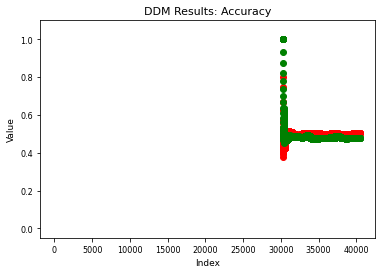

In [190]:
plt.figure(figsize=(6,4))
plt.scatter("index", "original_accuracy", data=status, label="Original Accuracy", color='red')
plt.scatter("index", "accuracy", data=status, label="Retrain Accuracy", color='green')
plt.grid(False, axis="x")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title("DDM Results: Accuracy", fontsize=11)
plt.ylabel("Value", fontsize=9)
plt.xlabel("Index", fontsize=9)
ylims = [-0.05, 1.1]
plt.ylim(ylims)

plt.axvspan(100, 125, alpha=0.5, label="Drift Induction Window")

# Draw red lines that indicate where drift was detected
plt.vlines(
    x=status.loc[status["drift_detected"] == "drift"]["index"],
    ymin=ylims[0],
    ymax=ylims[1],
    label="Drift Detected",
    color="red",
    linewidth=3,
)

# Draw orange lines that indicate where warnings of drift were provided
plt.vlines(
    x=status.loc[status["drift_detected"] == "warning"]["index"],
    ymin=ylims[0],
    ymax=ylims[1],
    label="Warning",
    color="orange",
    alpha=0.3,
)

# Create a list of lines that indicate the retraining windows.
# Space them evenly, vertically.
rec_list = pd.DataFrame(rec_list)
rec_list["y_val"] = np.linspace(
    start=0.05 * (ylims[1] - ylims[0]) + ylims[0],
    stop=0.2 * ylims[1],
    num=len(rec_list),
)

# Draw green lines that indicate where retraining occurred
plt.hlines(
    y=rec_list["y_val"],
    xmin=rec_list[0],
    xmax=rec_list[1],
    color="green",
    label="Retraining Windows",
)

plt.legend(loc="Lower Left")
plt.show()
# plt.savefig("example_DDM.png")

### NB and DDM 

In [191]:
np.random.seed(123)
# setup classifier: train on first training_size rows
X_train = df4.loc[0:training_size, ['category','rating','Mean']]
y_train = df4.loc[0:training_size, "label"]
X_test = df4.loc[training_size:len(df4),  ['category','rating','Mean']]
y_true = df4.loc[training_size:len(df4), "label"]

clf = GaussianNB()
clf.fit(X_train, y_train)

acc_orig = np.cumsum(clf.predict(X_test) == y_true)
acc_orig = acc_orig / np.arange(1, 1 + len(acc_orig))

In [192]:
ddm = DDM(n_threshold=100, warning_scale=7, drift_scale=10)

# setup DF to store results
status = pd.DataFrame(columns=["index", "y_true", "y_pred", "drift_detected"])
rec_list = []

In [193]:
for i in range(training_size, len(df4)):

    X_test = df3.loc[[i], ['category','rating','Mean']]
    y_pred = int(clf.predict(X_test))
    y_true = int(df3.loc[[i], "label"])

    ddm.update(y_true, y_pred)
    status.loc[i] = [i, y_true, y_pred, ddm.drift_state]

    # If drift is detected, examine the window and retrain.
    if ddm.drift_state == "drift":
        print("Detected at"+str(i))
        retrain_start = ddm.retraining_recs[0] +training_size
        retrain_end = ddm.retraining_recs[1] + training_size
        if (
            retrain_start == retrain_end
        ):  # minimum retraining window in case of sudden drift
            retrain_start = max(0, retrain_start - 300)
        rec_list.append([retrain_start, retrain_end])

        # If retraining is not desired, omit the next four lines.
        X_train = df4.loc[retrain_start:retrain_end, ['category','rating','Mean']]
        y_train = df4.loc[retrain_start:retrain_end, "label"]
        clf = GaussianNB()
        clf.fit(X_train, y_train)

status['original_accuracy'] = acc_orig
status['accuracy'] = np.cumsum(status.y_true == status.y_pred)
status['accuracy'] = status['accuracy'] / np.cumsum(np.repeat(1, status.shape[0]))

Detected at33842
Detected at40387


In [194]:
status['accuracy'].tail(1)

40431    0.582905
Name: accuracy, dtype: float64

In [195]:
status['original_accuracy'].tail(1)

40431    0.580431
Name: original_accuracy, dtype: float64

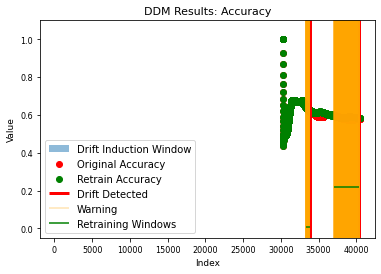

In [197]:
plt.figure(figsize=(6,4))
plt.scatter("index", "original_accuracy", data=status, label="Original Accuracy", color='red')
plt.scatter("index", "accuracy", data=status, label="Retrain Accuracy", color='green')
plt.grid(False, axis="x")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title("DDM Results: Accuracy", fontsize=11)
plt.ylabel("Value", fontsize=9)
plt.xlabel("Index", fontsize=9)
ylims = [-0.05, 1.1]
plt.ylim(ylims)

plt.axvspan(100, 125, alpha=0.5, label="Drift Induction Window")

# Draw red lines that indicate where drift was detected
plt.vlines(
    x=status.loc[status["drift_detected"] == "drift"]["index"],
    ymin=ylims[0],
    ymax=ylims[1],
    label="Drift Detected",
    color="red",
    linewidth=3,
)

# Draw orange lines that indicate where warnings of drift were provided
plt.vlines(
    x=status.loc[status["drift_detected"] == "warning"]["index"],
    ymin=ylims[0],
    ymax=ylims[1],
    label="Warning",
    color="orange",
    alpha=0.3,
)

# Create a list of lines that indicate the retraining windows.
# Space them evenly, vertically.
rec_list = pd.DataFrame(rec_list)
rec_list["y_val"] = np.linspace(
    start=0.05 * (ylims[1] - ylims[0]) + ylims[0],
    stop=0.2 * ylims[1],
    num=len(rec_list),
)

# Draw green lines that indicate where retraining occurred
plt.hlines(
    y=rec_list["y_val"],
    xmin=rec_list[0],
    xmax=rec_list[1],
    color="green",
    label="Retraining Windows",
)

plt.legend(loc="lower left")
plt.show()
# plt.savefig("example_DDM.png")

### CNN and DDM 

In [198]:
X_train = df4.loc[0:training_size, ['category','rating','Mean']]
y_train = df4.loc[0:training_size, "label"]
X_test = df4.loc[training_size:len(df4), ['category','rating','Mean']]
y_true = df4.loc[training_size:len(df4), "label"]

In [199]:
model=Sequential()
model.add(Dense(1000,input_dim=3,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [200]:
model.fit(X_train,y_train,validation_data=(X_test,y_true),batch_size=20,epochs=10,verbose=1)

Epoch 1/10
1517/1517 [==============================] - 21s 13ms/step - loss: 0.0000e+00 - accuracy: 0.4999 - val_loss: 0.0000e+00 - val_accuracy: 0.5002
Epoch 2/10
1517/1517 [==============================] - 19s 13ms/step - loss: 0.0000e+00 - accuracy: 0.4999 - val_loss: 0.0000e+00 - val_accuracy: 0.5002
Epoch 3/10
1517/1517 [==============================] - 23s 15ms/step - loss: 0.0000e+00 - accuracy: 0.4999 - val_loss: 0.0000e+00 - val_accuracy: 0.5002
Epoch 4/10
1517/1517 [==============================] - 22s 14ms/step - loss: 0.0000e+00 - accuracy: 0.4999 - val_loss: 0.0000e+00 - val_accuracy: 0.5002
Epoch 5/10
1517/1517 [==============================] - 23s 15ms/step - loss: 0.0000e+00 - accuracy: 0.4999 - val_loss: 0.0000e+00 - val_accuracy: 0.5002
Epoch 6/10
1517/1517 [==============================] - 21s 14ms/step - loss: 0.0000e+00 - accuracy: 0.4999 - val_loss: 0.0000e+00 - val_accuracy: 0.5002
Epoch 7/10
1517/1517 [==============================] - 20s 13ms/step - loss

In [201]:
acc_orig = np.cumsum(clf.predict(X_test) == y_true)
acc_orig = acc_orig / np.arange(1, 1 + len(acc_orig))
print(acc_orig)

30324    1.000000
30325    1.000000
30326    1.000000
30327    1.000000
30328    1.000000
           ...   
40427    0.584323
40428    0.584265
40429    0.584306
40430    0.584249
40431    0.584290
Name: label, Length: 10108, dtype: float64


In [202]:
for i in range(training_size,len(df4)-i):

    X_test = df4.loc[[i], ['category','rating','Mean']]
    y_pred = int(clf.predict(X_test))
    y_true = int(df4.loc[[i], "label"])

    eddm.update(y_true, y_pred)
    status.loc[i] = [
        i, y_true, y_pred, eddm.mean(), eddm.drift_state,
    ]

In [204]:
    # If drift is detected, examine the window and retrain.
    if ddm.drift_state == "drift":
        retrain_start = ddm.retraining_recs[0] + training_size
        retrain_end = ddm.retraining_recs[1] + training_size
        rec_list.append([retrain_start, retrain_end])

        # The retraining recommendations produced here correspond to the samples
        # which belong to ADWIN's new, smaller window, after drift is detected.
        # If retraining is not desired, omit the next four lines.
        X_train = df4.loc[retrain_start:retrain_end, ['category','rating','Mean']]
        y_train = df4.loc[retrain_start:retrain_end, "label"]
        model=Sequential()
        model.add(Dense(1000,input_dim=3,activation='relu'))
        model.add(Dense(500,activation='relu'))
        model.add(Dense(300,activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(1,activation='softmax'))
        model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
        model.fit(X_train,y_train,validation_data=(X_test,y_true),batch_size=20,epochs=10,verbose=1)
status['original_accuracy'] = acc_orig
status['accuracy'] = np.cumsum(status.y_true == status.y_pred)
status['accuracy'] = status['accuracy'] / np.cumsum(np.repeat(1, status.shape[0]))

In [ ]:
status['original_accuracy'].tail(1)

In [ ]:
status['accuracy'].tail(1)

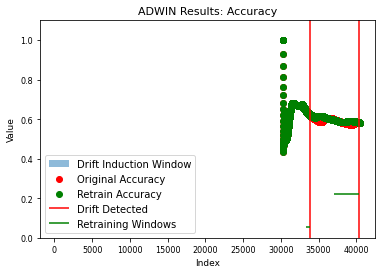

In [203]:
plt.figure(figsize=(6,4))
plt.scatter("index", "original_accuracy", data=status, label="Original Accuracy", color='red')
plt.scatter("index", "accuracy", data=status, label="Retrain Accuracy", color='green')
plt.grid(False, axis="x")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title("ADWIN Results: Accuracy", fontsize=11)
plt.ylabel("Value", fontsize=9)
plt.xlabel("Index", fontsize=9)
ylims = [0, 1.1]
plt.ylim(ylims)

plt.axvspan(100, 125, alpha=0.5, label="Drift Induction Window")

# Draw red lines that indicate where drift was detected
plt.vlines(
    x=status.loc[status["drift_detected"] == "drift"]["index"],
    ymin=ylims[0],
    ymax=ylims[1],
    label="Drift Detected",
    color="red",
)

# Create a list of lines that indicate the retraining windows.
# Space them evenly, vertically.
rec_list = pd.DataFrame(rec_list)
rec_list["y_val"] = np.linspace(
    start=0.05 * (ylims[1] - ylims[0]) + ylims[0],
    stop=0.2 * ylims[1],
    num=len(rec_list),
)

# Draw green lines that indicate where retraining occurred
plt.hlines(
    y=rec_list["y_val"],
    xmin=rec_list[0],
    xmax=rec_list[1],
    color="green",
    label="Retraining Windows",
)

plt.legend(loc='lower left')
plt.show()
# plt.savefig("example_ADWINAccuracy.png")